In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [175]:
frame = load_iris(as_frame=True)
df = frame['data']
X = df.values
y = np.array(frame['target'])

y_map = {0: "setosa", 1: "versicolor", 2: "virginica"}
y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


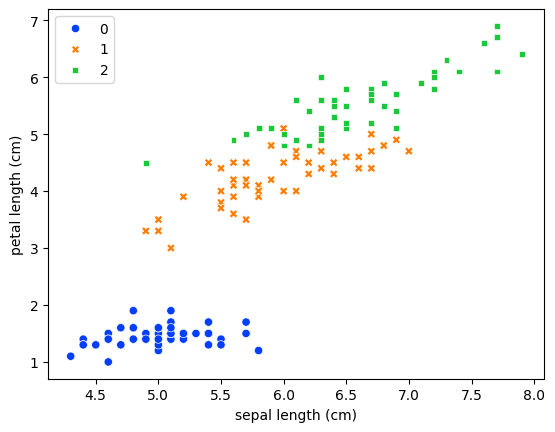

In [176]:
sns.scatterplot(data=df,
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=y,
                style=y,
                palette="bright")
plt.show()

## Sklearn routine
- Initialize method
- fit
- transfrom/predict

### Normalizations

In [177]:
# z-score, fit and then transform

#Standardize features by removing the mean and scaling to unit variance.
# z = (x - u) / s

# u is the mean and s the standard deviation

scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

In [178]:
# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

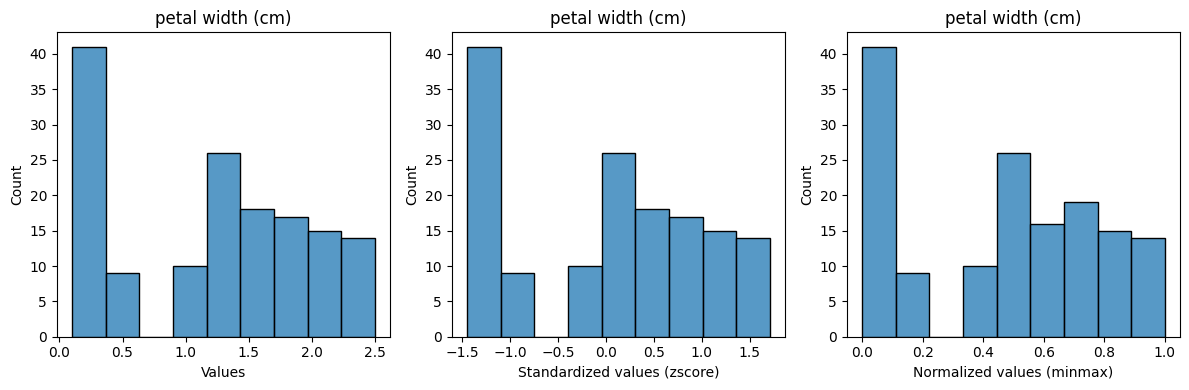

In [179]:
i = 3 # column index
fig, axs = plt.subplots(1,3, figsize=(12, 4)) # 1 row, 3 columns

sns.histplot(X[:,i], ax=axs[0]).set(title=df.columns[i])
axs[0].set(xlabel='Values')

sns.histplot(X_scal[:,i], ax=axs[1]).set(title=df.columns[i])
axs[1].set(xlabel='Standardized values (zscore)')

sns.histplot(X_minmax[:,i], ax=axs[2]).set(title=df.columns[i])
axs[2].set(xlabel='Normalized values (minmax)')

plt.tight_layout() # Adjust the padding between and around subplots

### Kmeans

In [180]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100, random_state=94)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=94)

In [181]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

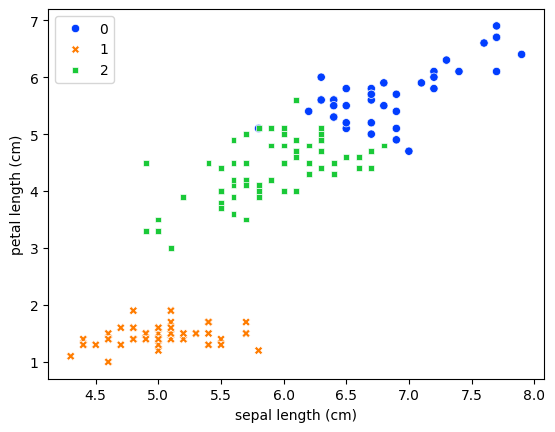

In [182]:
sns.scatterplot(data=df,
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=kmeans.labels_,
                style=kmeans.labels_,
                palette="bright")
plt.show()

In [ ]:
# ndarray of shape (n_clusters, n_features)
kmeans.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

In [ ]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[6.84615385, 3.08205128, 5.7025641 , 2.07948718],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88852459, 2.73770492, 4.39672131, 1.41803279]])

In [ ]:
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0:"A", 1: "B", 2: "C"})

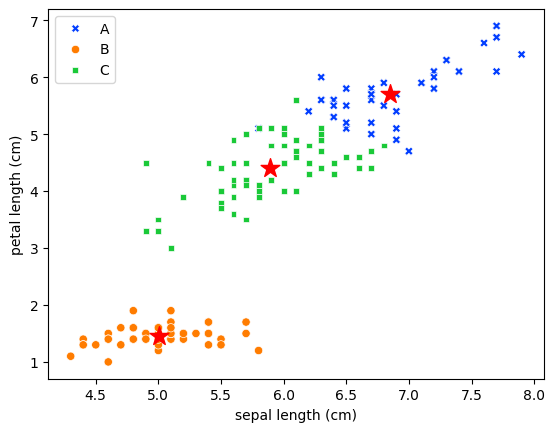

In [ ]:
sns.scatterplot(data=df,
                x="sepal length (cm)",
                y="petal length (cm)",
                hue='kmeans_labels',
                style='kmeans_labels',
                palette="bright",
                hue_order=["A", "B", "C"]
               )
plt.legend()
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200)
plt.show()

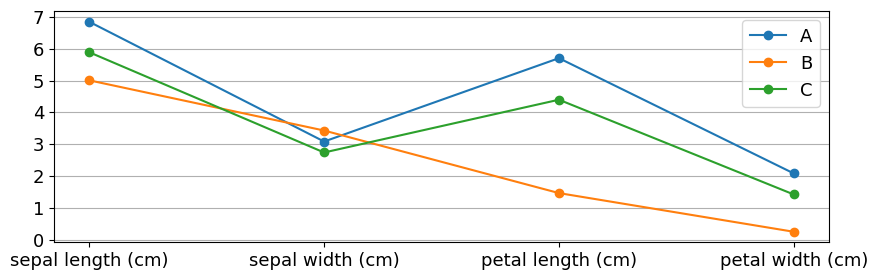

In [ ]:
plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C']

for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])

plt.xticks(range(0,len(df.columns) - 1), df.columns[:-1], fontsize=13)
plt.yticks(fontsize=13)

plt.legend(fontsize=13, loc='best')
plt.grid(axis='y')

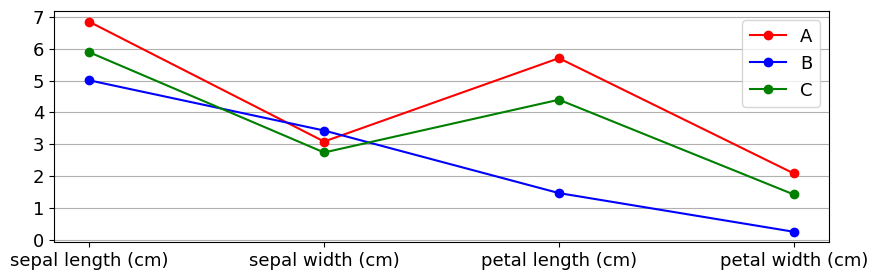

In [ ]:
plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C']

# color customization (fixed to 3 colors, it would not work if the clusters would be 5)
colors = {
    'A': 'r',
    'B': 'b',
    'C': 'g',
}

for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i], color=colors[clust_name[i]])

plt.xticks(range(0,len(df.columns) - 1), df.columns[:-1], fontsize=13)
plt.yticks(fontsize=13)

plt.legend(fontsize=13, loc='best')
plt.grid(axis='y')

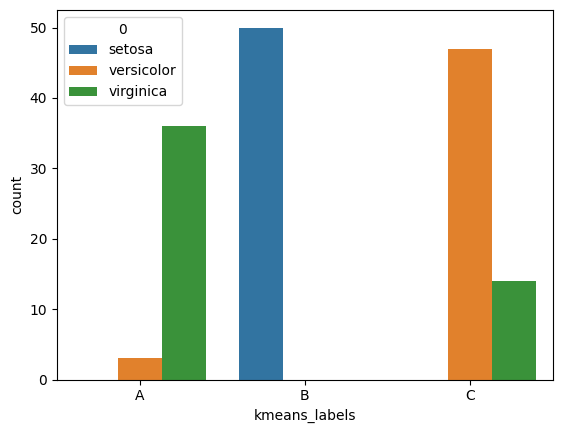

In [ ]:
sns.countplot(data=df, x='kmeans_labels', hue=y_mapped, order=["A", "B", "C"])
plt.show()

In [ ]:
y_mapped

,0
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [ ]:
y_mapped.groupby(df['kmeans_labels']).value_counts(normalize=True)

kmeans_labels  0         
A              virginica     0.923077
               versicolor    0.076923
B              setosa        1.000000
C              versicolor    0.770492
               virginica     0.229508
Name: proportion, dtype: float64

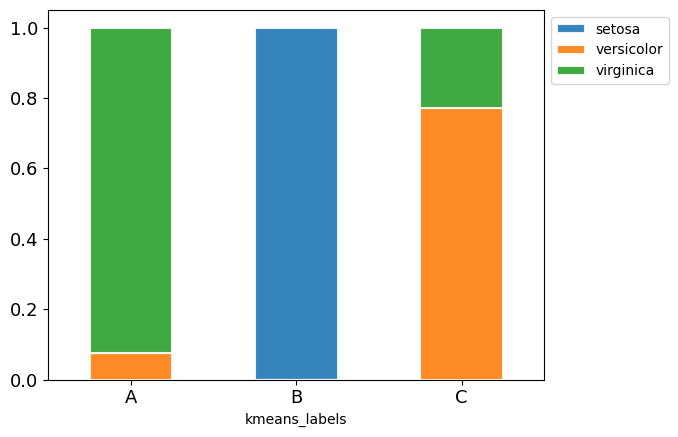

In [ ]:
bar_pl = y_mapped.groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.9, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=13, rotation=0)
plt.yticks(fontsize=13)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([39, 50, 61]))

In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 6.982216473785234
Silhouette 0.5047687565398589


In [ ]:
# how do we select the number of clusters k?

In [ ]:
%%time
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state = 42)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

CPU times: user 4.39 s, sys: 19 ms, total: 4.41 s
Wall time: 6.84 s


In [ ]:
sse_list

[12.12779075053819,
 6.982216473785234,
 5.516933472040375,
 4.5809486401172945,
 3.97642424820984,
 3.473622320733247,
 3.1456415905967785,
 2.814016644149028,
 2.5608613580326587,
 2.2987533401137896,
 2.164318065645078,
 2.0022593438158807,
 1.9136218419482227,
 1.845344088641389,
 1.7250142667163755,
 1.6428239677141323,
 1.5736603125876003,
 1.4746274728453737,
 1.3854324519788492,
 1.2910389408577807,
 1.2772755130523463,
 1.1940938985455984,
 1.1577934403006787,
 1.1071461465584955,
 1.0704311954625618,
 1.0267934761861963,
 0.9752628007631279,
 0.9344469529963271,
 0.9098453553268242,
 0.898175535380677,
 0.8211419791349482,
 0.808951770629316,
 0.7788104386486097,
 0.7628687044231548,
 0.7704024908892751,
 0.715901256957508,
 0.6921080400722284,
 0.6728572465814967,
 0.632164669967409,
 0.6184770195918264,
 0.6067667847598058,
 0.5760920060753081,
 0.5591060283729715,
 0.518060741783396,
 0.5403486678437852,
 0.5265759718954294,
 0.48127059027582497,
 0.470708307743383,
 0.470

In [ ]:
%%time
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100,random_state = 42)
    kmeans.fit(X_minmax)
    sil_list.append(silhouette_score(X_minmax, kmeans.labels_))

CPU times: user 3.71 s, sys: 16.6 ms, total: 3.72 s
Wall time: 3.81 s


In [ ]:
pdist(X_minmax).shape

(11175,)

In [ ]:
squareform(pdist(X_minmax))

array([[0.        , 0.21561354, 0.16810102, ..., 1.08257132, 1.14907064,
        0.96462829],
       [0.21561354, 0.        , 0.10157824, ..., 1.08390691, 1.17619813,
        0.95649502],
       [0.16810102, 0.10157824, 0.        , ..., 1.12088708, 1.19544459,
        0.98859665],
       ...,
       [1.08257132, 1.08390691, 1.12088708, ..., 0.        , 0.226928  ,
        0.18710825],
       [1.14907064, 1.17619813, 1.19544459, ..., 0.226928  , 0.        ,
        0.28409587],
       [0.96462829, 0.95649502, 0.98859665, ..., 0.18710825, 0.28409587,
        0.        ]])

In [ ]:
%%time
sil_list = []
dist = squareform(pdist(X_minmax)) # using a precomputed distance matrix

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sil_list.append(silhouette_score(dist, kmeans.labels_, metric='precomputed'))

CPU times: user 2.85 s, sys: 15.3 ms, total: 2.86 s
Wall time: 2.88 s


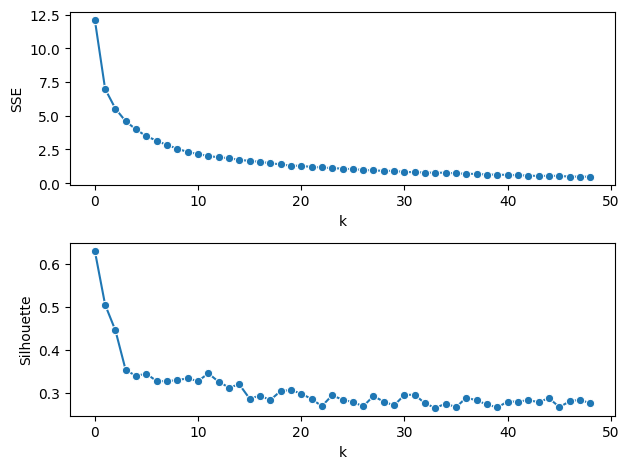

In [ ]:
fig, axs = plt.subplots(2)

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout() # Adjust the padding between and around subplots

### Bisecting K-means

In [ ]:
from sklearn.cluster import BisectingKMeans

In [ ]:
bkmeans = BisectingKMeans(n_clusters=3, n_init=10, max_iter=100, random_state=94)
bkmeans.fit(X_minmax)

BisectingKMeans(max_iter=100, n_clusters=3, n_init=10, random_state=94)

In [ ]:
centers = scaler.inverse_transform(bkmeans.cluster_centers_)
centers

array([[5.88852459, 2.73770492, 4.39672131, 1.41803279],
       [6.84615385, 3.08205128, 5.7025641 , 2.07948718],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

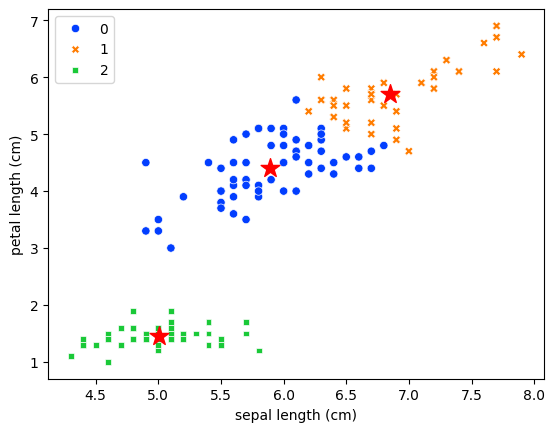

In [ ]:
sns.scatterplot(data=df,
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=bkmeans.labels_,
                style=bkmeans.labels_,
                palette="bright",
               )
plt.legend()
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200)
plt.show()

In [ ]:
print('SSE', bkmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, bkmeans.labels_))

SSE 6.982216473785234
Silhouette 0.5047687565398589


In [ ]:
# distance matrix to speed up sil score

### k medoids

In [ ]:
#!pip install pyclustering

In [ ]:
# standard installation might result in error due to numpy warnings (numpy > 1.24.0)

#after installing pyclustering, also install this warning fix below

#!pip install https://github.com/KulikDM/pyclustering/archive/Warning-Fix.zip

In [183]:
from pyclustering.cluster import kmedoids

In [184]:
# Set random initial medoids.
initial_medoids = [1, 50]

kmedoids_instance = kmedoids.kmedoids(X, initial_medoids)
kmedoids_instance.process()

In [185]:
clusters = kmedoids_instance.get_clusters()

In [186]:
clusters = [np.array(x) for x in clusters]

In [187]:
clusters3

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 57,
        98]),
 array([ 50,  51,  52,  53,  54,  55,  56,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149])]

### DBScan

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_minmax)

DBSCAN(eps=0.3)

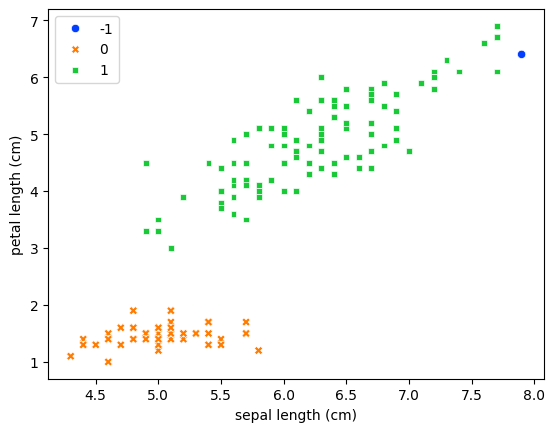

In [ ]:
sns.scatterplot(data=df,
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=dbscan.labels_,
                style=dbscan.labels_,
                palette="bright")
plt.show()

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 1, 50, 99]))

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
print('Silhouette', silhouette_score(X_minmax, dbscan.labels_)) # counting silhouette also w.r.t to noise cluster (-1)
print('Silhouette', silhouette_score(X_minmax[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

Silhouette 0.4681853590627469
Silhouette 0.6331315097272541


### kth neighbor distance

In [ ]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

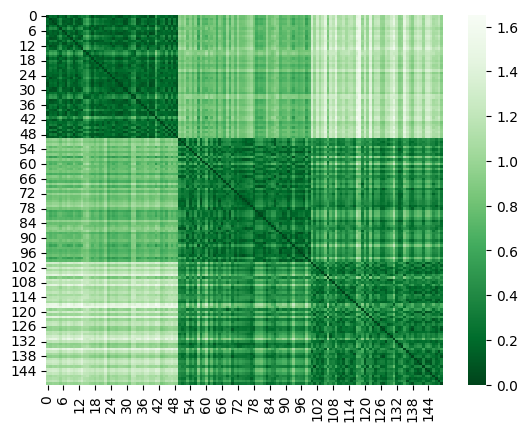

In [ ]:
sns.heatmap(dist, cmap="Greens_r", annot=False)
plt.show()

In [ ]:
k=4
kth_distances = []

for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

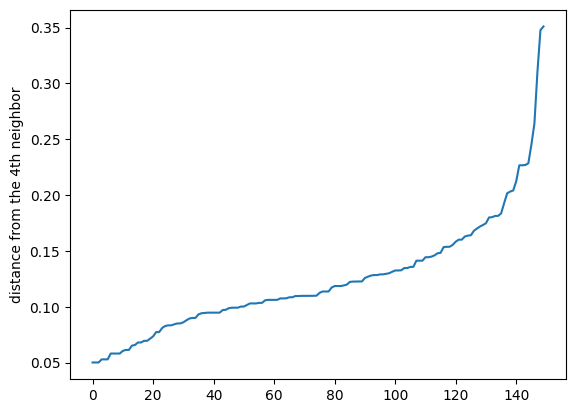

In [ ]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))

plt.show()

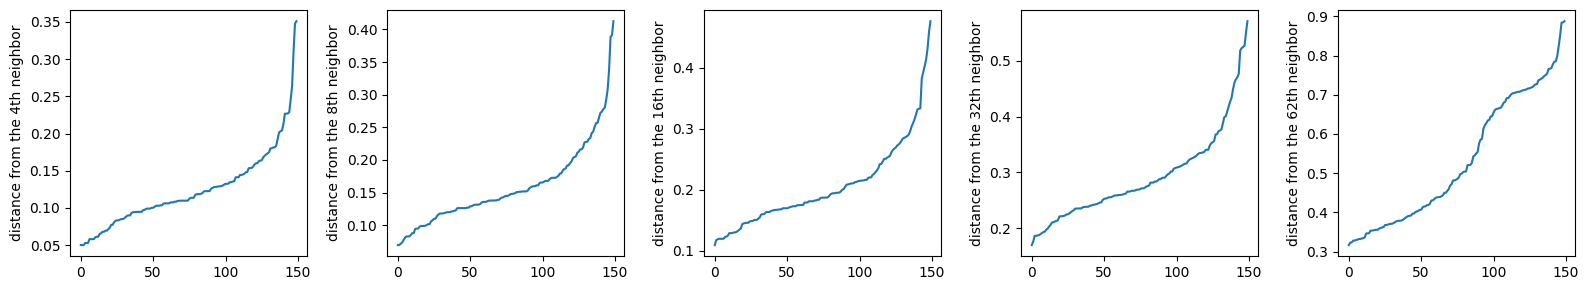

In [ ]:
ks = [4, 8, 16, 32, 62]

fig = plt.figure(figsize=(16, 3)) # dimensions of the overall plot
fig_dims = (1, len(ks))

for i in range(len(ks)):
    k = ks[i]
    kth_distances = []

    for d in dist:  # d is a vector containing distances between the ith record and all the others
        index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
        kth_distances.append(d[index_kth_distance])  # store the distance in a list

    plt.subplot2grid(fig_dims, (0, i))
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('distance from the {}th neighbor'.format(k))

plt.tight_layout()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.19, min_samples=4, metric='precomputed')
dbscan.fit(dist)

DBSCAN(eps=0.19, metric='precomputed', min_samples=4)

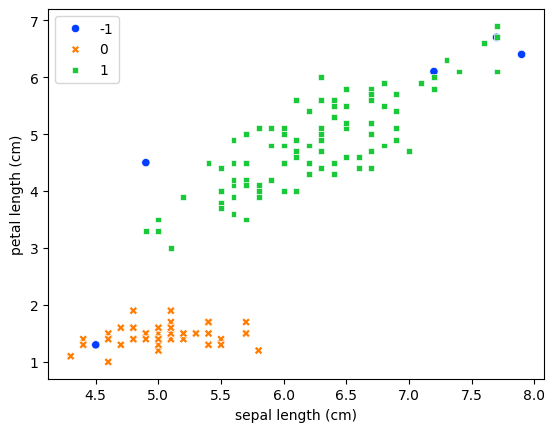

In [ ]:
sns.scatterplot(data=df,
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=dbscan.labels_,
                style=dbscan.labels_,
                palette="bright")
plt.show()

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 5, 49, 96]))

In [ ]:
df['dblabels'] = dbscan.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_labels,dblabels
0,5.1,3.5,1.4,0.2,B,0
1,4.9,3.0,1.4,0.2,B,0
2,4.7,3.2,1.3,0.2,B,0
3,4.6,3.1,1.5,0.2,B,0
4,5.0,3.6,1.4,0.2,B,0


In [ ]:
# dbscan centroids
df[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)','petal length (cm)', 'dblabels']].groupby('dblabels').mean()

,sepal length (cm),sepal width (cm),petal width (cm),petal length (cm)
dblabels,,,,
-1,6.440000,3.200000,1.740000,5.000000
0,5.016327,3.451020,0.244898,1.465306
1,6.234375,2.848958,1.658333,4.863542


In [ ]:
print('Silhouette', silhouette_score(X_minmax[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

Silhouette 0.6432450335271236


### OPTICS

In [ ]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [ ]:
optics = OPTICS(min_samples = 4, max_eps = np.inf, min_cluster_size=40)
optics.fit(X_minmax)

OPTICS(min_cluster_size=40, min_samples=4)

In [ ]:
print("Silhouette", silhouette_score(X_minmax[optics.labels_ != -1], optics.labels_[optics.labels_ != -1]))

Silhouette 0.6901722966689927


In [ ]:
np.unique(optics.labels_, return_counts=True)

(array([-1,  0,  1]), array([33, 47, 70]))

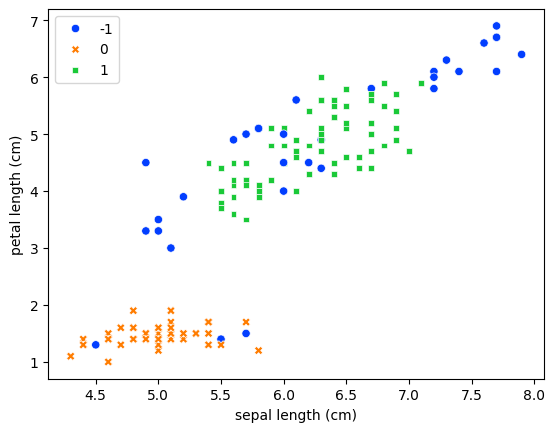

In [ ]:
sns.scatterplot(data=df,
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=optics.labels_,
                style=optics.labels_,
                palette="bright")
plt.show()

Text(0.5, 1.0, 'Reachability Plot')

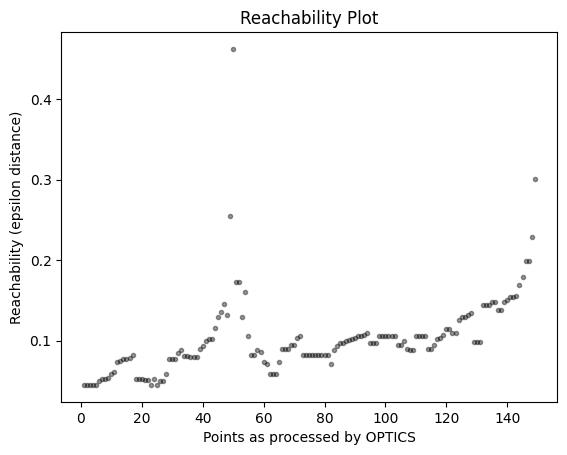

In [ ]:
# Valleys in the plot correspond to the clusters
space = np.arange(len(X_minmax))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

# Reachability plot
plt.plot(space, reachability, "k.", alpha=0.4)
plt.xlabel("Points as processed by OPTICS")
plt.ylabel("Reachability (epsilon distance)")
# plt.axhline(0.3, c="red")
plt.title("Reachability Plot")

### Hierarchical

In [ ]:
def get_linkage_matrix(model):
    # Create linkage matrix

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    linkage_matrix = get_linkage_matrix(model)
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
# it is the linkage distance threshold above which clusters will not be merged
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                metric='euclidean', linkage='complete')
model = model.fit(X_minmax)

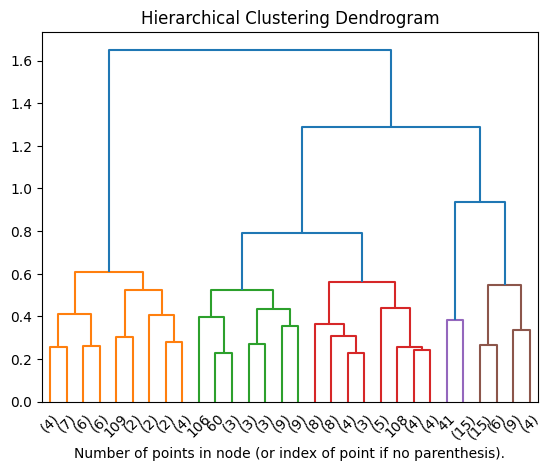

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode='lastp', color_threshold=0.7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# get the labels according to a specific threshold value cut
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=0.7, criterion='distance')

In [ ]:
labels

array([5, 4, 4, 4, 5, 5, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4, 4, 5,
       5, 4, 5, 4, 5, 5, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 3, 1,
       1, 3, 1, 3, 3, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3], dtype=int32)

In [ ]:
print('Silhouette', silhouette_score(X_minmax, labels))

Silhouette 0.3364082243047556


#### Choosing the number of clusters

In [ ]:
hier = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
hier.fit(X_minmax)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [ ]:
hier.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

#### Precomputed distance matrix

In [ ]:
hier = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')
hier.fit(dist)

AgglomerativeClustering(linkage='complete', metric='precomputed', n_clusters=3)

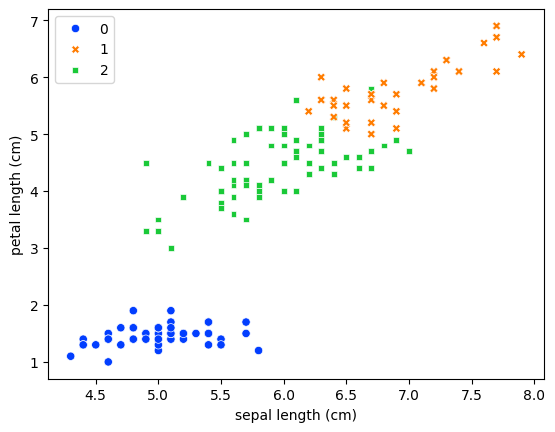

In [ ]:
sns.scatterplot(data=df,
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=hier.labels_,
                style=hier.labels_,
                palette="bright")
plt.show()

###  HDBScan

In [ ]:
from sklearn.cluster import HDBSCAN

In [ ]:
hdb = HDBSCAN(cluster_selection_epsilon=0.3, min_samples=30,
              min_cluster_size=5, max_cluster_size=None,
              store_centers="centroid")
hdb.fit(X_minmax)

HDBSCAN(cluster_selection_epsilon=0.3, min_samples=30, store_centers='centroid')

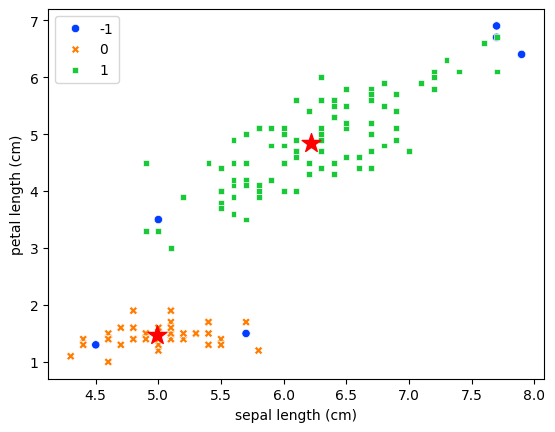

In [ ]:
sns.scatterplot(data=df,
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=hdb.labels_,
                style=hdb.labels_,
                palette="bright")

plt.scatter(scaler.inverse_transform(hdb.centroids_)[:,0], scaler.inverse_transform(hdb.centroids_)[:,2], c='red', marker='*', s=200)
plt.show()

In [ ]:
np.unique(hdb.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 6, 48, 96]))

In [ ]:
hdb.centroids_

array([[0.19207892, 0.58858965, 0.0796667 , 0.05915125],
       [0.53191836, 0.36183505, 0.65110017, 0.64597702]])

In [ ]:
print("Silhouette", silhouette_score(X_minmax[hdb.labels_ != -1], hdb.labels_[hdb.labels_ != -1]))

Silhouette 0.6480221541804821


### Similarity Matrix for Cluster Validation

In [ ]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

In [ ]:
hier = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')
hier.fit(dist)

AgglomerativeClustering(linkage='complete', metric='precomputed', n_clusters=3)

In [ ]:
ideal_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
shape = len(X_minmax)
ideal_sim = np.eye(shape)

for i in range(shape):
    for j in range(0, i+1):
        ideal_sim[j][i] = 1 if hier.labels_[i] == hier.labels_[j] else 0

ideal_sim = ideal_sim + ideal_sim.T - np.diag(np.diag(ideal_sim)) # copying upper triangle in lower triangle

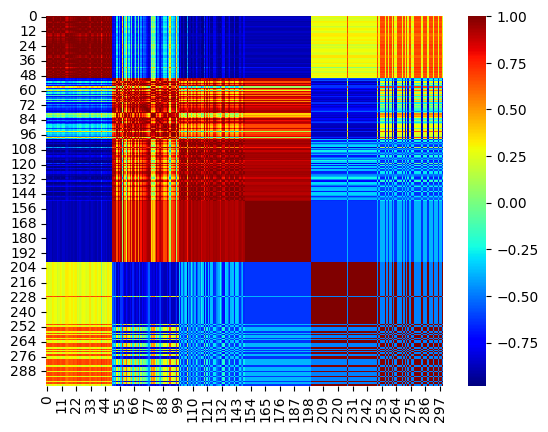

In [ ]:
sim = np.corrcoef(dist, ideal_sim)
sns.heatmap(sim, cmap="jet", annot=False)
plt.show()

#### SSE Statistical evaluation

In [ ]:
import random

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100, random_state=94)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=94)

In [ ]:
my_sse = kmeans.inertia_
my_sse

6.982216473785234

In [ ]:
N = 500
sse_stats = []

for _ in range(N):
    Xi = np.zeros(shape=X_minmax.shape)

    for cidx in range(Xi.shape[1]):
        col = X_minmax[:, cidx]
        min, max, nor = np.min(col), np.max(col), len(col)
        Xi[:, cidx] = np.random.uniform(min, max, (1, nor))

    kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100, random_state=94)
    kmeans.fit(Xi)
    sse_stats.append(kmeans.inertia_)

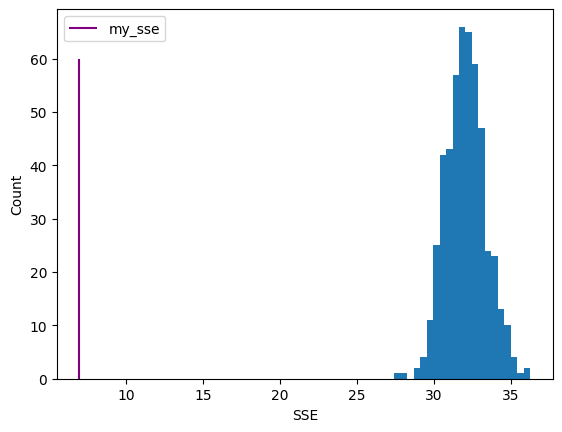

In [ ]:
plt.hist(sse_stats, bins='auto')
plt.vlines(x = my_sse, ymin = 0, ymax = 60, colors = 'purple', label = 'my_sse')
plt.xlabel('SSE')
plt.ylabel('Count')
plt.legend()
plt.show()